In [23]:
#Import dataset and libs
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Dataset Preparation

In [24]:
#loading the dataset
wine_dataframe = pd.read_csv('modified_datatest.csv', index_col=0)

#dataset cleaning
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)
wine_dataframe = wine_dataframe[wine_dataframe['Red'] != 1]
wine_dataframe = wine_dataframe.drop('Red', axis=1)

wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].str.replace(';', '')
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].str.replace(';', '')
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].str.replace(';', '')
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].str.replace(';', '')
wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].astype(float)
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].astype(float)
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].astype(float)
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].astype(float)
wine_dataframe = wine_dataframe.reset_index(drop=True)

wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('/+', '+', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace(',+', '+', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('/+', '+', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace(',+', '+', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã©', 'é', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã‰', 'é', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã©', 'é', regex=True)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã‰', 'é', regex=True)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lower()
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lower()
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lstrip('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lstrip('+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.split('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.split('+')

wine_dataframe['Aromas'] = wine_dataframe['Aromas'].apply(lambda x: [] if isinstance(x, float) else x)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].apply(lambda x: [] if isinstance(x, float) else x)

In [25]:
#transformation of word lists for aromas into columns of binary variables. 
mlb = MultiLabelBinarizer()
Aromas_one_hot_encoded = mlb.fit_transform(wine_dataframe['Aromas'])
Aromas_df_encoded = pd.DataFrame(Aromas_one_hot_encoded, columns=mlb.classes_)
Olphactive_one_hot_encoded = mlb.fit_transform(wine_dataframe['Olphactive'])
Olphactive_df_encoded = pd.DataFrame(Olphactive_one_hot_encoded, columns=mlb.classes_)
df_concatenated_0 = pd.concat([wine_dataframe, Aromas_df_encoded], axis=1)
df_concatenated = pd.concat([df_concatenated_0, Olphactive_df_encoded], axis=1)

df_concatenated.drop('Aromas', axis=1, inplace=True)
df_concatenated.drop('Olphactive', axis=1, inplace=True)

In [26]:
#remove the observations for which all continuous values are missing
mask = (df_concatenated['Léger to Puissant'] != 0) | (df_concatenated['Souple to Tannique'] != 0) | (df_concatenated['Sec to Moelleux'] != 0) | (df_concatenated['Doux to Acide'] != 0)
df_concatenated = df_concatenated[mask]

# Datset Split

In [27]:
#Split the varieties and the parameters
X = df_concatenated.drop('Cépages', axis=1)
y = df_concatenated['Cépages']

#Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)

# Prediction

In [28]:
#Selection of model parameters
classifier = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto')

#Train the model on train dataset
classifier.fit(X_train, y_train)

#Predict varieties of test dataset
y_pred = classifier.predict(X_test)

#Print the results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Chardonnay       0.98      0.98      0.98       566
    Riesling       0.96      0.95      0.96       280

    accuracy                           0.97       846
   macro avg       0.97      0.97      0.97       846
weighted avg       0.97      0.97      0.97       846



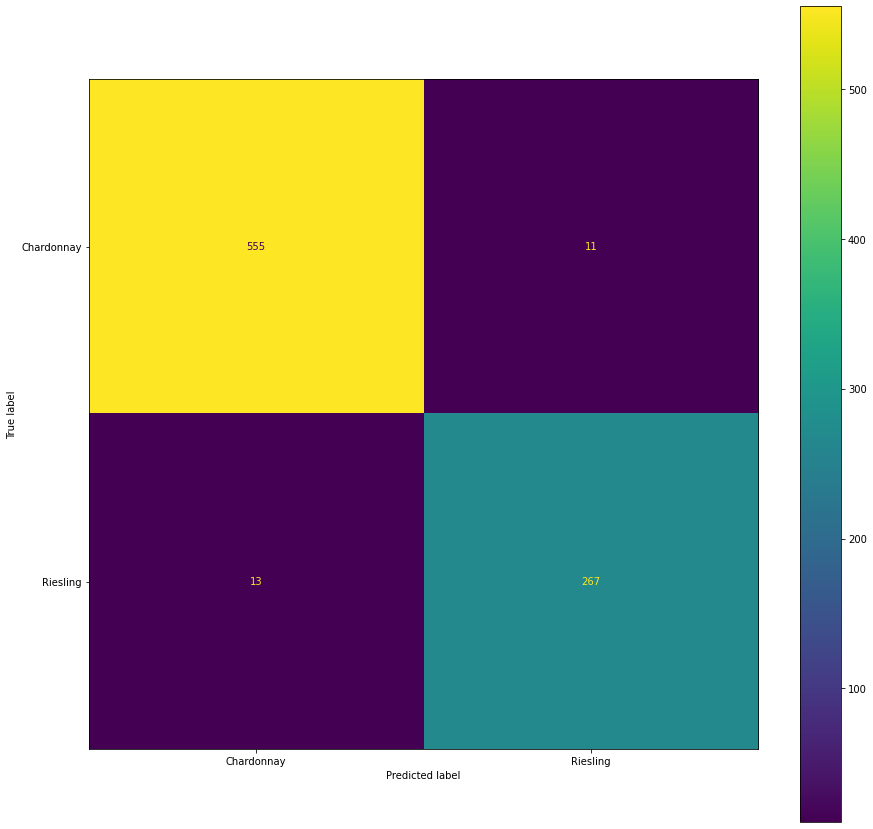

In [35]:
#Creation of a confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Chardonnay", "Riesling"])
cm_display.plot(ax=ax)

plt.savefig('wine_confusion_continuous_matrix.png', dpi=300)
plt.show()

# GridSearch

In [ ]:
#Optimize model parameters
svm_model = SVC()
param_grid = {'C': [1, 10, 50, 100, 150], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['auto', 'scale']}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose = 4, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [14]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best score:  0.9739715486864237
